In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [9]:
temp =  pd.read_csv('Gapfilled data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

In [10]:
radii = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500,750,1000,1500,2000,5000,10000]
# loop through saved parquet files and read them into a dictionary
stns_dict = {}
for i in radii:
    stns_dict[f'stns_r{i}'] = gpd.read_parquet(f'stns_r{i}.parquet')

In [11]:
# remove FRTECH from every radius in stns_dict
for i in radii:
    stns_dict[f'stns_r{i}'] = stns_dict[f'stns_r{i}'][stns_dict[f'stns_r{i}']['ID']!='FRTECH']

In [12]:
temp['datetime_UTC'].dt.hour

0         0
1         0
2         0
3         0
4         0
         ..
359442    6
359443    6
359444    6
359445    6
359446    6
Name: datetime_UTC, Length: 359447, dtype: int32

In [13]:
temp['datetime_UTC'].unique()

<DatetimeArray>
['2022-09-01 00:00:00+00:00', '2022-09-01 01:00:00+00:00',
 '2022-09-01 02:00:00+00:00', '2022-09-01 03:00:00+00:00',
 '2022-09-01 04:00:00+00:00', '2022-09-01 05:00:00+00:00',
 '2022-09-01 06:00:00+00:00', '2022-09-01 07:00:00+00:00',
 '2022-09-01 08:00:00+00:00', '2022-09-01 09:00:00+00:00',
 ...
 '2023-08-31 21:00:00+00:00', '2023-08-31 22:00:00+00:00',
 '2023-08-31 23:00:00+00:00', '2023-09-01 00:00:00+00:00',
 '2023-09-01 01:00:00+00:00', '2023-09-01 02:00:00+00:00',
 '2023-09-01 03:00:00+00:00', '2023-09-01 04:00:00+00:00',
 '2023-09-01 05:00:00+00:00', '2023-09-01 06:00:00+00:00']
Length: 8767, dtype: datetime64[ns, UTC]

In [7]:
# perform a regression for each hour of the temp data file with avg_area_height and car in stns_dict[stns_r100]
# save the results in a dictionary
results_car = {}

for i in temp['datetime_UTC'].unique():
    x = stns_dict['stns_r100']['car']
    y = temp[temp['datetime_UTC']==i]['value']
    res = stats.linregress(x, y)
    results_car[i] = res
    

KeyboardInterrupt: 

In [74]:
# mask by nan values in avg_area_height of stns_dict['stns_r100'] and perform a regression for each hour of the temp data file with avg_area_height in stns_dict[stns_r100]
# save the results in a dictionary

results_height = {}

for i in temp['datetime_UTC'].unique():
    x = stns_dict['stns_r100']['avg_area_height'].reset_index(drop=True)
    y = temp[temp['datetime_UTC']==i]['value'].reset_index(drop=True)
    mask = x.isna()
    x = x[~mask]
    y = y[~mask]
    res = stats.linregress(x, y)
    results_height[i] = res

In [75]:
results_height

{Timestamp('2022-09-01 00:00:00+0000', tz='UTC'): LinregressResult(slope=0.13164124449825806, intercept=14.367624249594023, rvalue=0.6095307162363157, pvalue=0.0002728418198963553, stderr=0.03179365496779351, intercept_stderr=0.40312470376665016),
 Timestamp('2022-09-01 01:00:00+0000', tz='UTC'): LinregressResult(slope=0.12704633514537064, intercept=14.0765131859764, rvalue=0.5912832959871449, pvalue=0.00046028539142693216, stderr=0.03217751327999717, intercept_stderr=0.4079917996872739),
 Timestamp('2022-09-01 02:00:00+0000', tz='UTC'): LinregressResult(slope=0.139344674286965, intercept=13.49378248219343, rvalue=0.6418655609459781, pvalue=9.940773680393796e-05, stderr=0.03091285672321551, intercept_stderr=0.3919567039948915),
 Timestamp('2022-09-01 03:00:00+0000', tz='UTC'): LinregressResult(slope=0.13854549133413166, intercept=13.12124784096416, rvalue=0.6503783655545069, pvalue=7.473276050997973e-05, stderr=0.030048183466265095, intercept_stderr=0.3809931595104282),
 Timestamp('202

In [76]:
# create a dataframe from results_car with column name eg slope, intercept, rvalue, pvalue, stderr
results_height_df = pd.DataFrame(results_height).T
results_height_df.columns = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']


In [77]:
results_height_df

,slope,intercept,rvalue,pvalue,stderr
2022-09-01 00:00:00+00:00,0.131641,14.367624,0.609531,0.000273,0.031794
2022-09-01 01:00:00+00:00,0.127046,14.076513,0.591283,0.000460,0.032178
2022-09-01 02:00:00+00:00,0.139345,13.493782,0.641866,0.000099,0.030913
2022-09-01 03:00:00+00:00,0.138545,13.121248,0.650378,0.000075,0.030048
2022-09-01 04:00:00+00:00,0.117384,12.805333,0.661205,0.000051,0.024732
...,...,...,...,...,...
2023-09-01 02:00:00+00:00,0.017995,18.529612,0.410491,0.021805,0.007423
2023-09-01 03:00:00+00:00,0.017585,18.477662,0.393650,0.028451,0.007626
2023-09-01 04:00:00+00:00,0.025663,17.810708,0.267197,0.146188,0.017186
2023-09-01 05:00:00+00:00,0.025542,18.051811,0.165708,0.372989,0.028227


In [ ]:
# create a dataframe from results_car with column name eg slope, intercept, rvalue, pvalue, stderr
results_car_df = pd.DataFrame(results_car).T
results_car_df.columns = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']

In [49]:
# calculate r squared
results_car_df['r_squared'] = results_car_df['rvalue']**2

In [78]:
# calculate r squared
results_height_df['r_squared'] = results_height_df['rvalue']**2

In [50]:
# select all 00:00:00+00:00 timestamps from results_car_df
results_car_df[results_car_df.index.hour==0]


,slope,intercept,rvalue,pvalue,stderr,r_squared
2022-09-01 00:00:00+00:00,5.494989,14.586245,0.658369,2.886593e-06,1.005970,0.433449
2022-09-02 00:00:00+00:00,4.975858,16.491426,0.509882,6.608537e-04,1.344274,0.259980
2022-09-03 00:00:00+00:00,3.760953,15.578265,0.696222,4.315253e-07,0.620923,0.484725
2022-09-04 00:00:00+00:00,4.033429,14.942289,0.504067,7.790511e-04,1.106621,0.254084
2022-09-05 00:00:00+00:00,5.697502,16.071523,0.533933,3.240445e-04,1.444750,0.285085
...,...,...,...,...,...,...
2023-08-28 00:00:00+00:00,2.946283,14.039392,0.662778,2.345491e-06,0.533027,0.439275
2023-08-29 00:00:00+00:00,2.306564,12.004812,0.490347,1.135680e-03,0.656464,0.240440
2023-08-30 00:00:00+00:00,2.315579,12.558909,0.430856,4.920656e-03,0.776611,0.185637
2023-08-31 00:00:00+00:00,2.974001,13.645471,0.610021,2.292977e-05,0.618586,0.372126


In [56]:
results_car_df.to_parquet('results_car_df.parquet')

In [14]:
results_car_df= pd.read_parquet('results_car_df.parquet')

In [15]:
results_height_df= pd.read_parquet('results_height_df.parquet')

<Axes: >

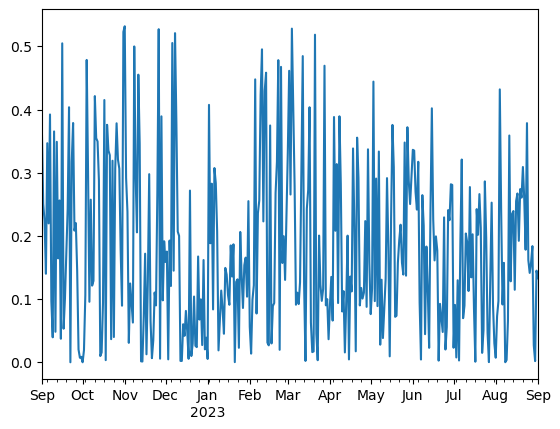

In [81]:
# plot r squared for 00:00:00+00:00
results_height_df[results_car_df.index.hour==0]['r_squared'].plot()

In [ ]:
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])

(19236.0, 19237.0)

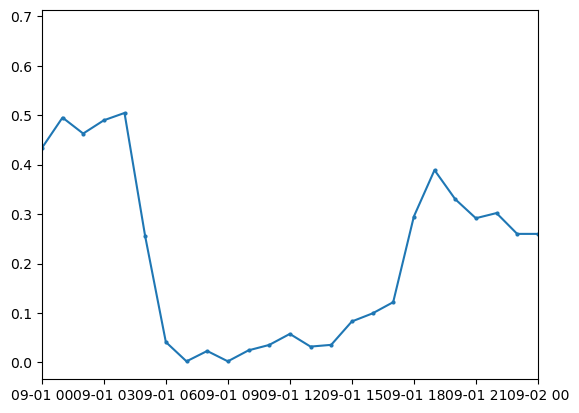

In [33]:
# plot rvalue against time for results_car
rsquared = [i.rvalue**2 for i in results_car.values()]
plt.plot(temp['datetime_UTC'].unique(), rsquared, 'o',linestyle='-', markersize=2)  
plt.xlim(temp['datetime_UTC'].unique()[0], temp['datetime_UTC'].unique()[24])

(19236.0, 19240.0)

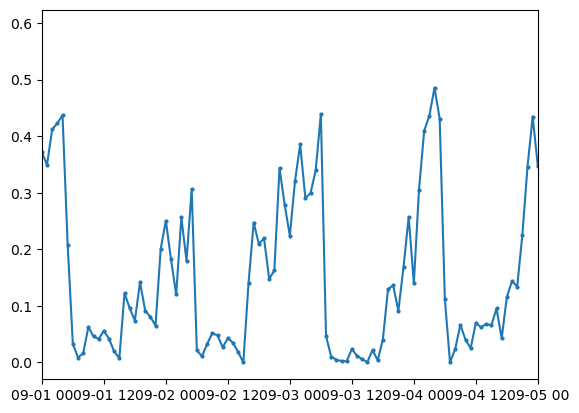

In [85]:
# plot rvalue against time for results_height
rsquared = [i.rvalue**2 for i in results_height.values()]
plt.plot(temp['datetime_UTC'].unique(), rsquared, 'o',linestyle='-', markersize=2)  
plt.xlim(temp['datetime_UTC'].unique()[0], temp['datetime_UTC'].unique()[96])

In [32]:
float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].intercept)

/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/1295630037.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].intercept)


14.58624543431787

In [35]:
float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].slope)

/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/2355362499.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].slope)


5.494988541757224

In [53]:
stns_dict['stns_r10']

,ID,Type,Elevation (m a.s.l),UAC,LCZ,Longitude (°E),Latitude (°N),geometry,height,area,avg_area_height,car
0,FRASHA,T1,296,11210,6,7.870209,47.986557,"POLYGON ((4191877.298 5324750.579, 4191877.25 ...",NaN,0.000000,NaN,0.000000
1,FRBETZ,T2,250,11210,5,7.817673,48.004900,"POLYGON ((4188067.653 5327001.249, 4188067.605...",NaN,0.000000,NaN,0.000000
2,FRBRUH,T1,238,12100,8,7.854189,48.031009,"POLYGON ((4190948.03 5329756.106, 4190947.982 ...",NaN,0.000000,NaN,0.000000
3,FRDIET,T2,230,13300,C,7.792878,48.013766,"POLYGON ((4186271.904 5328087.592, 4186271.856...",NaN,0.000000,NaN,0.000000
4,FRDREI,T1,260,12220,6,7.826545,47.995872,"POLYGON ((4188675.059 5325961.778, 4188675.011...",NaN,0.000000,NaN,0.000000
5,FREBNE,T11,340,23000,C,7.922671,47.983431,"POLYGON ((4195773.842 5324194.382, 4195773.794...",NaN,0.000000,NaN,0.000000
6,FREICH,T2,695,31000,A,7.882986,47.954049,"POLYGON ((4192637.561 5321085.9, 4192637.513 5...",NaN,0.000000,NaN,0.000000
7,FRFRIE,T2,257,14100,9,7.841538,48.010887,"POLYGON ((4189883.881 5327570.282, 4189883.833...",3.372000,18.694430,3.372000,0.059602
8,FRGART,T2,262,11220,6,7.824259,47.986798,"POLYGON ((4188449.778 5324962.363, 4188449.73 ...",NaN,0.000000,NaN,0.000000
9,FRGLBA,T2,289,11220,6,7.868736,48.006918,"POLYGON ((4191888.862 5327019.807, 4191888.813...",10.390000,22.383988,10.390000,0.071365


In [68]:
station_id = stns_dict['stns_r100']['LCZ']
unique_station_ids = station_id.unique()


In [74]:
# Convert station IDs to a sequence of numbers for coloring
station_ids = stns_dict['stns_r100']['LCZ']
unique_station_ids = station_ids.unique()

# Create a colormap and assign a unique color to each station ID
cmap = cm.get_cmap('tab10', len(unique_station_ids))
color_dict = {station_id: cmap(i) for i, station_id in enumerate(unique_station_ids)}

# Map the colors to the station IDs
colors = [color_dict[station_id] for station_id in station_ids]

/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/365461854.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(unique_station_ids))


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/925493524.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  intercept = float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].intercept)
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/925493524.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  slope = float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].slope)


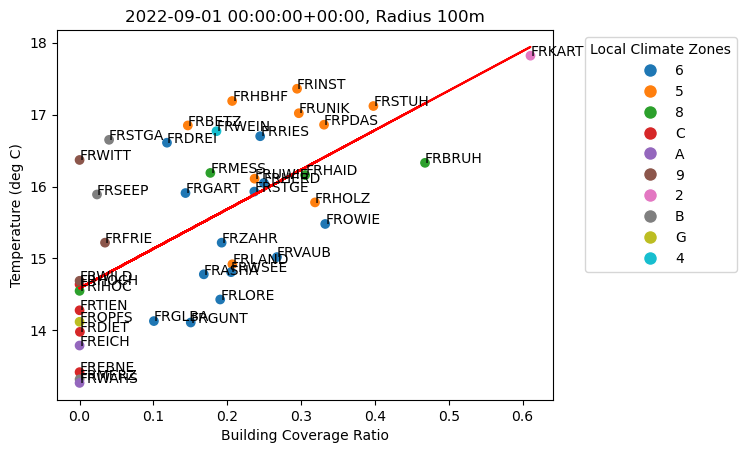

In [75]:
# plot temp against stns_dict['stns100'] car for the 100m radius and add regression line for the first 24 hours
x=stns_dict['stns_r100']['car']
y=temp[temp['datetime_UTC'] ==  '2022-09-01 00:00:00+00:00']['value']
intercept = float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].intercept)
slope = float(results_car_df[results_car_df.index ==  '2022-09-01 00:00:00+00:00'].slope)

plt.scatter(stns_dict['stns_r100']['car'], temp[temp['datetime_UTC'] ==  '2022-09-01 00:00:00+00:00']['value'], c=colors)

# Create a legend for the station IDs
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[station_id], markersize=10) for station_id in unique_station_ids]
labels = unique_station_ids
plt.legend(handles, labels, title='Local Climate Zones', bbox_to_anchor=(1.05, 1), loc='upper left')

# add label of station ID to each point
for i, txt in enumerate(stns_dict['stns_r100']['ID']):
    plt.annotate(txt, (x.iloc[i], y.iloc[i]))

plt.plot(x, intercept + slope * x, color='red')
plt.xlabel('Building Coverage Ratio')
plt.ylabel('Temperature (deg C)')
plt.title('2022-09-01 00:00:00+00:00, Radius 100m')
plt.show()


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/3020994957.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  intercept = float(results_car_df[results_car_df.index ==  '2022-09-01 09:00:00+00:00'].intercept)
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_3501/3020994957.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  slope = float(results_car_df[results_car_df.index ==  '2022-09-01 09:00:00+00:00'].slope)


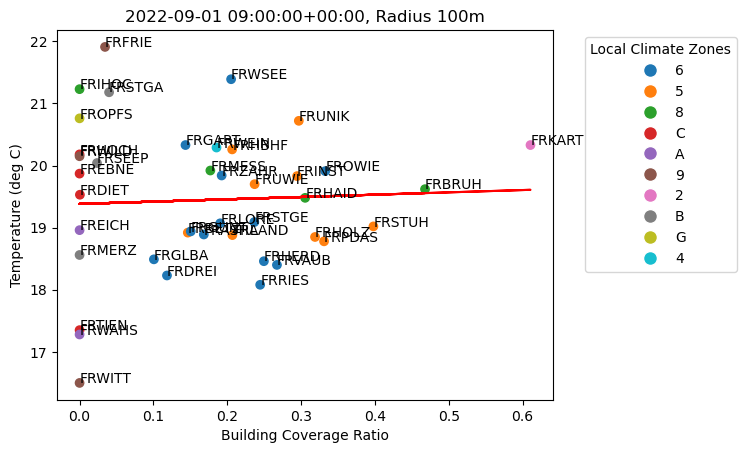

In [76]:
# plot temp against stns_dict['stns100'] car for the 100m radius and add regression line for the first 24 hours
x=stns_dict['stns_r100']['car']
y=temp[temp['datetime_UTC'] ==  '2022-09-01 09:00:00+00:00']['value']
intercept = float(results_car_df[results_car_df.index ==  '2022-09-01 09:00:00+00:00'].intercept)
slope = float(results_car_df[results_car_df.index ==  '2022-09-01 09:00:00+00:00'].slope)

plt.scatter(stns_dict['stns_r100']['car'], temp[temp['datetime_UTC'] ==  '2022-09-01 09:00:00+00:00']['value'], c=colors)

# Create a legend for the station IDs
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[station_id], markersize=10) for station_id in unique_station_ids]
labels = unique_station_ids
plt.legend(handles, labels, title='Local Climate Zones', bbox_to_anchor=(1.05, 1), loc='upper left')

# add label of station ID to each point
for i, txt in enumerate(stns_dict['stns_r100']['ID']):
    plt.annotate(txt, (x.iloc[i], y.iloc[i]))

plt.plot(x, intercept + slope * x, color='red')
plt.xlabel('Building Coverage Ratio')
plt.ylabel('Temperature (deg C)')
plt.title('2022-09-01 09:00:00+00:00, Radius 100m')
plt.show()